In [5]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
# Load the dataset from CSV file
df = pd.read_csv('amazon-reviews.csv')

# Handle missing values in the 'Review' column
df['reviewTitle'].fillna('', inplace=True)

# Perform sentiment analysis on each review
sentiments = []
for review in df['reviewTitle']:
    sentiment_score = TextBlob(str(review)).sentiment.polarity
    if sentiment_score > 0:
        sentiment = 'Positive'
    elif sentiment_score < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    sentiments.append(sentiment)

# Add sentiment analysis results to the DataFrame
df['Sentiment'] = sentiments

# Display the DataFrame with sentiment analysis results
print(df[['reviewTitle', 'Sentiment']])

                         reviewTitle Sentiment
0                               Good  Positive
1   Decent phone with some drawbacks  Positive
2                       Good product  Positive
3                             📷 Best  Positive
4                Not Fully Optimized   Neutral
..                               ...       ...
75                         VERY NICE  Positive
76                        nice phone  Positive
77                Not upto the mark.   Neutral
78                   It's great deal  Positive
79                        Very phone  Positive

[80 rows x 2 columns]


In [7]:
positive_reviews = df[df['Sentiment'] == 'Positive']
# Display only the positive sentiment reviews
print(positive_reviews[['reviewTitle', 'Sentiment']])

                                          reviewTitle Sentiment
0                                                Good  Positive
1                    Decent phone with some drawbacks  Positive
2                                        Good product  Positive
3                                              📷 Best  Positive
5             Absolute Beast, Low budget, Daily Usage  Positive
6                                                Good  Positive
7                                          Good phone  Positive
8                                               Super  Positive
9                               Excellent performance  Positive
11                                       Best product  Positive
13                          nice phone in this budget  Positive
14                                    Daily used good  Positive
17                        Best phone this price range  Positive
19                                                 Ok  Positive
20                           Excellent b

In [6]:
neutral_reviews = df[df['Sentiment'] == 'Neutral']
print(neutral_reviews['Sentiment'])

4     Neutral
10    Neutral
12    Neutral
15    Neutral
16    Neutral
21    Neutral
23    Neutral
29    Neutral
32    Neutral
33    Neutral
34    Neutral
38    Neutral
39    Neutral
40    Neutral
42    Neutral
46    Neutral
47    Neutral
49    Neutral
57    Neutral
59    Neutral
63    Neutral
66    Neutral
68    Neutral
72    Neutral
73    Neutral
77    Neutral
Name: Sentiment, dtype: object


In [8]:
negative_reviews = df[df['Sentiment'] == 'Negative']
print(negative_reviews['Sentiment'])

18    Negative
30    Negative
31    Negative
35    Negative
37    Negative
41    Negative
Name: Sentiment, dtype: object


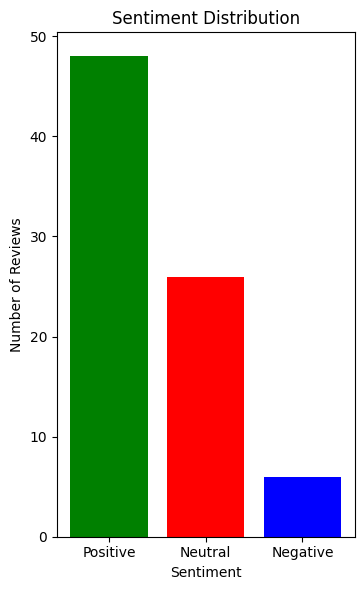

In [12]:
plt.figure(figsize=(10, 6))
sentiment_counts = df['Sentiment'].value_counts()
# Plot for Positive Sentiment
plt.subplot(1, 3, 1)
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')

plt.tight_layout()
plt.show()